In [161]:
# análise da distribuição dos pontos isoelétricos de proteínas presentes em proteomas UniProt

import pandas as pd
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis # [1]

# declaração da função principal - isoelectric_dist()
def isoelectric_dist(file_name):
    
    # abrir e ler ficheiro de texto do proteoma
    with open(file_name) as proteome:
        proteome_read = proteome.read()
    
    # separar as proteínas do proteoma
    prots = proteome_read.split("\n>") # ">" é separador comum para entradas sp e tr
    prots[0] = prots[0].replace(">", "") # corrige o mis-spliting da primeira linha do documento
    
    # obter a lista dos ids das proteínas e das suas sequências
    seqs = []
    prot_ids = []
    for prot in prots:
        lines = prot.split("\n")
        seqs.append(lines[1:]) # slice remove header do ficheiro em formato FASTA
        prot_ids.append(lines[0][3:9]) # slice do header que contém o ID de cada proteína
    
    # unir as linhas contendo somente sequencias de aa numa string
    seqs_final = ["\n".join(seq_line) for seq_line in seqs]
    
    # calcular pontos isoelétricos
    pi_list = []
    for seq in seqs_final:
        prot_for_analysis = ProteinAnalysis(seq) # criar objetos (proteínas cujo PI vão ser calculados)
        output = prot_for_analysis.isoelectric_point() # método da class ProteinAnalysis para estimar os P.I.
        pi_list.append(output)
        
    # criação de dicionário para o data_frame
    dic_list = [] # lista dos dicionários que serão inseridos no data-frame
    for n in range(len(prot_ids)):
        dic = {"ID Uniprot": prot_ids[n], "Ponto isoelétrico": round(pi_list[n], 2)}
        dic_list.append(dic)
    
    # output do data-frame
    data_frame = pd.DataFrame(dic_list)
    
    # outputs do histograma
    hist = plt.hist(pi_list, bins = 50, range = (3, 13), histtype = "bar", color = "darkorange", alpha = 0.75, edgecolor = "black")
    plt.xlabel("Ponto isoelétrico")
    plt.ylabel("Nº de proteínas anotadas")
    plt.show()
    
    # returns finais
    return data_frame

# António José Figueira - mestrando bioquímica FCUL (2020)

# Referências:
# [1] Peter J. A. Cock, Tiago Antao, Jeffrey T. Chang, Brad A. Chapman, Cymon J. Cox, Andrew Dalke, Iddo
# Friedberg, Thomas Hamelryck, Frank Kauff, Bartek Wilczynski, Michiel J. L. de Hoon: “Biopython:
# freely available Python tools for computational molecular biology and bioinformatics”. Bioinformatics
# 25 (11), 1422–1423 (2009). https://doi.org/10.1093/bioinformatics/btp163

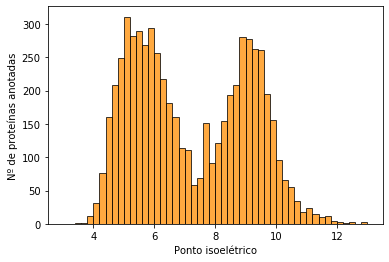

,ID Uniprot,Ponto isoelétrico
0,Q99190,9.55
1,P35184,4.35
2,P28707,4.46
3,P50089,9.10
4,P53169,5.15
...,...,...
6044,P35727,4.74
6045,Q06063,8.12
6046,P32657,6.10
6047,Q00362,5.96


In [162]:
# aplicar função - levedura
file_name = "yeast_proteome.txt"
isoelectric_dist(file_name)

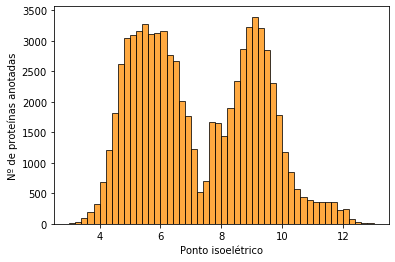

,ID Uniprot,Ponto isoelétrico
0,Q9NQ39,10.13
1,Q99470,6.83
2,Q8N8B7,8.86
3,Q658L1,9.12
4,O75494,11.26
...,...,...
74806,A0A0G2,5.24
74807,A0A1B0,5.19
74808,A0A2R8,6.33
74809,A0A1B0,9.47


In [154]:
# aplicar função - humano
file_name = "human_proteome.txt"
isoelectric_dist(file_name)

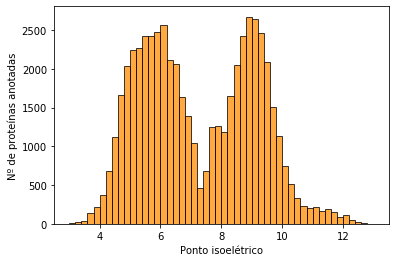

,ID Uniprot,Ponto isoelétrico
0,Q9CY27,9.60
1,Q8VBT2,6.67
2,P59222,8.67
3,Q9CQQ0,9.33
4,Q99K95,9.05
...,...,...
55407,Q3THM8,4.57
55408,Q8BH40,5.44
55409,Q9DCP4,9.42
55410,A0A286,4.96


In [155]:
# aplicar função - rato
file_name = "mice_proteome.txt"
isoelectric_dist(file_name)

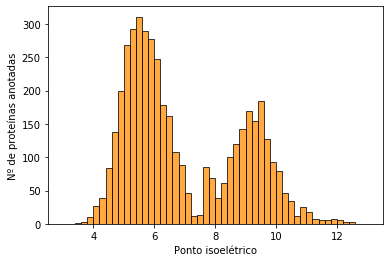

,ID Uniprot,Ponto isoelétrico
0,P25397,6.84
1,P42640,6.70
2,P0AGM2,9.30
3,P64442,8.18
4,P0A8Y5,5.11
...,...,...
4386,P0DSH2,4.37
4387,P08369,5.48
4388,P0AD70,9.50
4389,A0A385,11.07


In [156]:
# aplicar função - bactéria E. coli
file_name = "coli_proteome.txt"
isoelectric_dist(file_name)

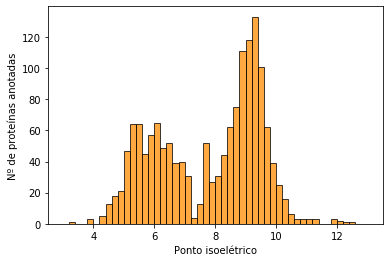

,ID Uniprot,Ponto isoelétrico
0,P56428,9.28
1,P56119,8.89
2,O25089,4.30
3,P71404,6.02
4,O25627,7.00
...,...,...
1547,O34810,5.44
1548,O34491,9.86
1549,O34550,8.44
1550,O34461,8.87


In [157]:
# aplicar função - bactéria acidófila H. pilori
file_name = "pilori_proteome.txt"
isoelectric_dist(file_name)

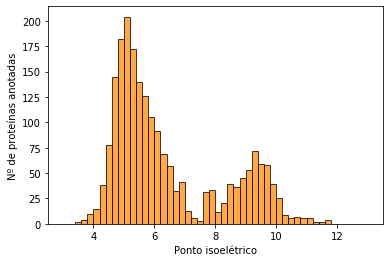

,ID Uniprot,Ponto isoelétrico
0,Q4FQ25,5.13
1,Q4FUL1,5.93
2,Q4FQ37,4.82
3,Q4FQB8,4.75
4,Q4FQB9,5.42
...,...,...
2094,Q4FTU1,5.28
2095,Q4FUI8,5.22
2096,Q4FT11,9.58
2097,Q4FT22,4.93


In [158]:
# aplicar função - bactéria psico
file_name = "psico_proteome.txt"
isoelectric_dist(file_name)

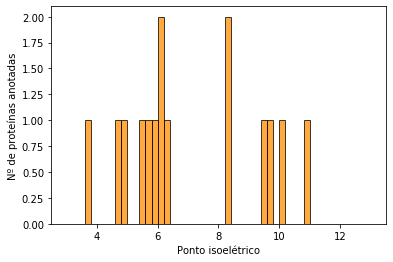

,ID Uniprot,Ponto isoelétrico
0,P59632,5.75
1,P59595,10.11
2,P59633,10.82
3,P0C6U8,5.91
4,Q7TFA1,3.77
5,Q7TFA0,8.30
6,P59636,4.90
7,P59634,4.64
8,Q80H93,9.45
9,P0C6X7,6.19


In [159]:
# aplicar função - virus SARS-cov (que infeta humanos)
file_name = "sars_proteome.txt"
isoelectric_dist(file_name)